项目：可视化帕默群岛企鹅数据

 分析目标

此数据分析报告的目的是对帕默群岛上企鹅样本的相关变量进行可视化，从而探索和分析种类、性别、所在岛屿等因素，与企鹅的身体属性，包括体重、嘴峰长度和深度、鳍的长度，之间的关系。

简介

原始数据`Penguins.csv`包括334个收集自南极洲帕尔默群岛的3个岛屿上的企鹅样本，以及企鹅相关属性数据，包括种类名、所在岛、嘴峰长度、嘴峰深度、鳍长度、体重、性别。

`Penguins.csv`每列的含义如下：
- species：企鹅的种类
- island：企鹅所在岛
- culmen_length_mm：企鹅嘴峰的长度（单位为毫米）
- culmen_depth_mm：企鹅嘴峰的深度（单位为毫米）
- flipper_length_mm：企鹅鳍的长度（单位为毫米）
- body_mass_g：企鹅体重（单位为克）
- sex：企鹅性别

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
raw_data = pd.read_csv('penguins.csv') 

In [28]:
raw_data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


# 数据清理整理

### 1. 结构性: 每个变量为一列，每个观察值为一行，每种类型的观察单位为一个表格


### 2. 内容性: 
- 重复: categories是否有重复
- 缺失: 是否drop?
- 错误/无效: descibe(), 负值
- 数据类型: 有限的种类: categories, int, object:str, date

In [29]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [36]:
raw_data[(raw_data['culmen_length_mm'].isnull()) |(raw_data['culmen_depth_mm'].isnull()) | (raw_data['flipper_length_mm'].isnull()) | (raw_data['body_mass_g'].isnull())]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [31]:
clean_data = raw_data.dropna(subset=['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g'])

In [32]:
clean_data.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  8
dtype: int64

In [33]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   island             342 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 21.4+ KB


species, sex and island shall be categories to improve performance

In [34]:
clean_data['species'] = clean_data['species'].astype('category')
clean_data['island'] = clean_data['island'].astype('category')
clean_data['sex'] = clean_data['sex'].astype('category')

C:\Users\DBC\AppData\Local\Temp\ipykernel_19368\64929504.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['species'] = clean_data['species'].astype('category')
C:\Users\DBC\AppData\Local\Temp\ipykernel_19368\64929504.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['island'] = clean_data['island'].astype('category')
C:\Users\DBC\AppData\Local\Temp\ipykernel_19368\64929504.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [ ]:
clean_data.info()
print(clean_data['sex'].value_counts()) # there is a '.' in sex
print(clean_data['species'].value_counts())
print(clean_data['island'].value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            342 non-null    category
 1   island             342 non-null    category
 2   culmen_length_mm   342 non-null    float64 
 3   culmen_depth_mm    342 non-null    float64 
 4   flipper_length_mm  342 non-null    float64 
 5   body_mass_g        342 non-null    float64 
 6   sex                334 non-null    category
dtypes: category(3), float64(4)
memory usage: 14.7 KB
MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64
Adelie       151
Gentoo       123
Chinstrap     68
Name: species, dtype: int64
Biscoe       167
Dream        124
Torgersen     51
Name: island, dtype: int64


In [38]:
clean_data['sex'] = clean_data['sex'].replace('.', np.nan)
clean_data['sex'].value_counts()

C:\Users\DBC\AppData\Local\Temp\ipykernel_19368\2686127635.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['sex'] = clean_data['sex'].replace('.', np.nan)


MALE      168
FEMALE    165
Name: sex, dtype: int64

### 无效错误

In [39]:
clean_data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


#  数据可视化

In [40]:
sns.set_palette('pastel')

企鹅种类

In [41]:
clean_data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


##  分类变量

In [ ]:
species_count = clean_data['species'].value_counts()
species_count

Adelie       151
Gentoo       123
Chinstrap     68
Name: species, dtype: int64

([<matplotlib.patches.Wedge at 0x191ac7df9d0>,
 [Text(0.2009557745501046, 1.0814882230865799, 'Adelie'),
  Text(-0.795473195165714, -0.759751535551492, 'Gentoo'),
  Text(0.8922884576047859, -0.6432894437384095, 'Chinstrap')],
 [Text(0.1096122406636934, 0.5899026671381343, '44%'),
  Text(-0.4338944700903894, -0.414409928482632, '36%'),
  Text(0.4867027950571559, -0.3508851511300415, '20%')])

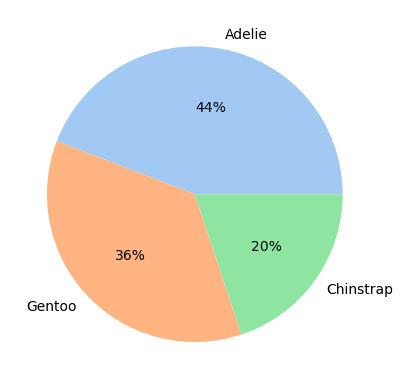

In [ ]:
plt.pie(species_count, autopct='%.0f%%', labels=species_count.index)

([<matplotlib.patches.Wedge at 0x191ad2cbc10>,
 [Text(0.04040900576302639, 1.099257527721891, 'Biscoe'),
  Text(-0.532406541905731, -0.9625711787374382, 'Dream'),
  Text(0.9814796665594582, -0.49668668608121047, 'Torgersen')],
 [Text(0.022041275870741665, 0.5995950151210313, '49%'),
  Text(-0.29040356831221686, -0.5250388247658754, '36%'),
  Text(0.535352545396068, -0.2709200105897511, '15%')])

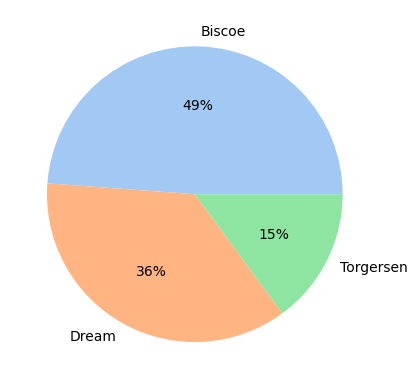

In [58]:
location_count = clean_data['island'].value_counts()
plt.pie(location_count, autopct='%.0f%%', labels=location_count.index)

([<matplotlib.patches.Wedge at 0x191ae253070>,
 [Text(-0.015565921257439953, 1.09988985907472, 'MALE'),
  Text(0.01556592125743982, -1.09988985907472, 'FEMALE')],
 [Text(-0.008490502504058155, 0.5999399231316653, '50%'),
  Text(0.008490502504058082, -0.5999399231316653, '50%')])

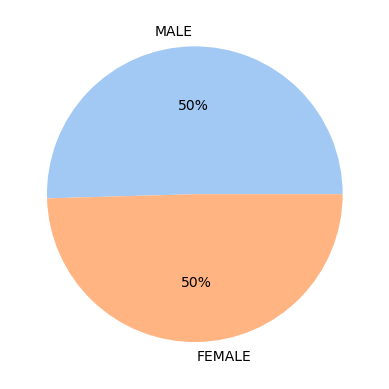

In [59]:
sex_count = clean_data['sex'].value_counts()
plt.pie(sex_count, autopct='%.0f%%', labels=sex_count.index)

企鹅种类

<Axes: xlabel='island', ylabel='count'>

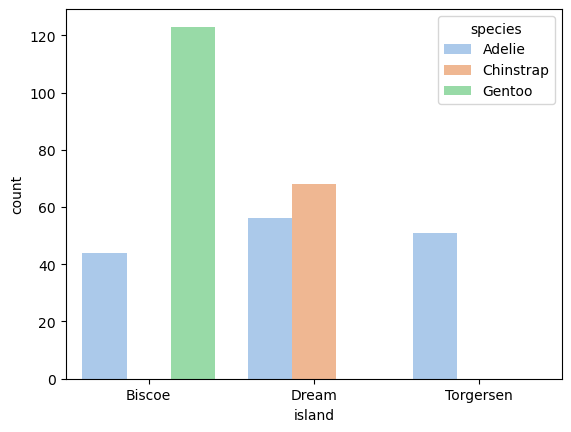

In [60]:
sns.countplot(clean_data, x='island', hue='species')

<Axes: xlabel='island', ylabel='count'>

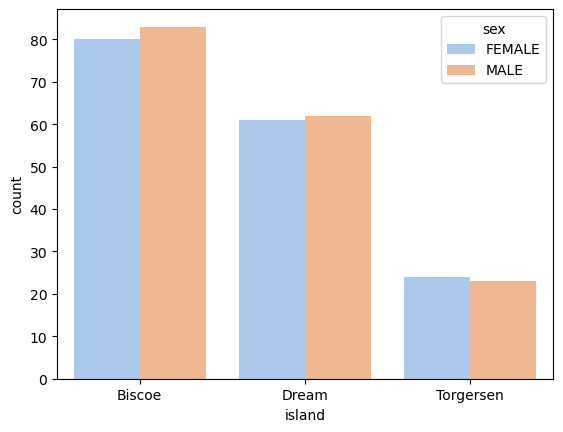

In [61]:
sns.countplot(clean_data, x='island', hue='sex')

## 数值变量

In [62]:
clean_data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [ ]:
sns.pairplot(clean_data)

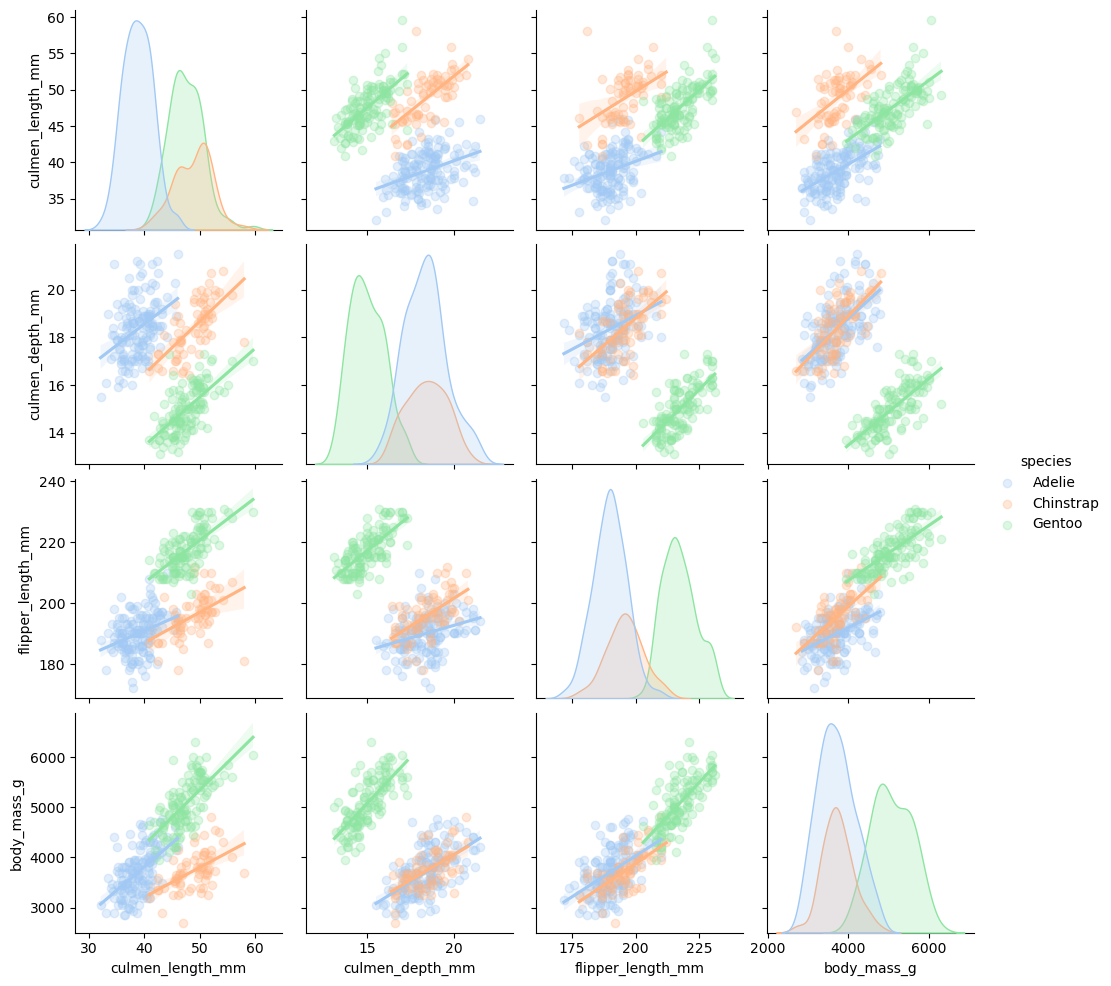

In [77]:
# 线性回归
# 'scatter_kws':{'alpha': 0.3}} : '散点图':{'透明度': 1代表完全不透明}} 
sns.pairplot(
    clean_data,
    hue="species",
    kind='reg',
    plot_kws={'scatter_kws': {'alpha': 0.3}} 
) # 线性回归
plt.show()

In [ ]:
sns.pairplot(clean_data, hue="island")

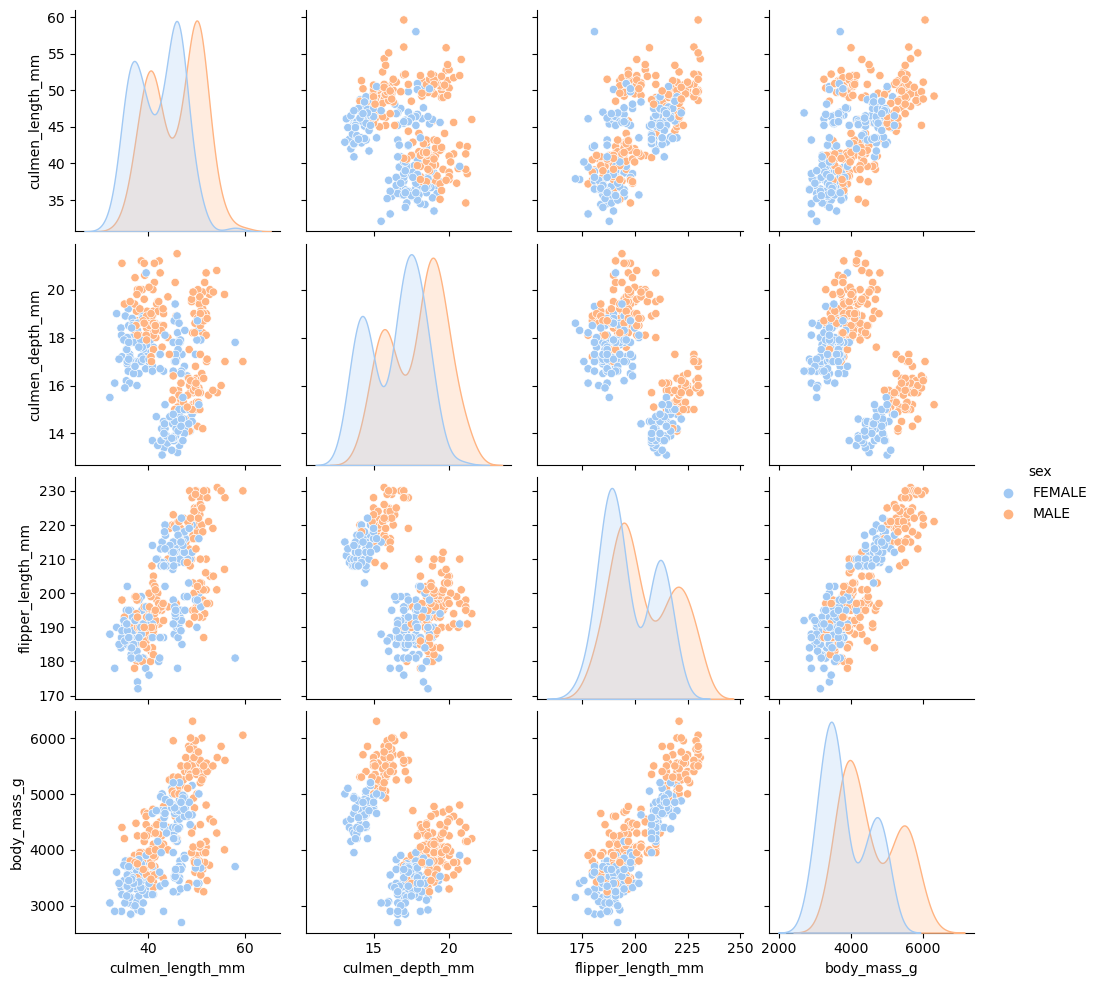

In [78]:
sns.pairplot(clean_data, hue="sex")

雄性身体数值更大